In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [6]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [7]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(196,input_dim=784))
model.add(Activation('relu'))
model.add(Dense(49))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [10]:
model.compile(loss='mse', optimizer=Adam(lr=0.001) ,metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 196)               153860    
_________________________________________________________________
activation_1 (Activation)    (None, 196)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 49)                9653      
_________________________________________________________________
activation_2 (Activation)    (None, 49)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                500       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 164,013
Trainable params: 164,013
Non-trainable params: 0
_________________________________________________________________


In [12]:
784*196+196

153860

In [13]:
196*49+49

9653

In [14]:
49*10+10

500

  #  Normalization

In [15]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [16]:
md=model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0133 - acc: 0.9129
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0060 - acc: 0.9617
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0043 - acc: 0.9731
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0034 - acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0028 - acc: 0.9830
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0023 - acc: 0.9858
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0019 - acc: 0.9882
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0017 - acc: 0.9898
Epoch 9/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0016 - acc: 0.9907
Epoch 10/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0014 - acc: 0.9919

In [17]:
x_train_1 = (x_train - x_train.min())/ (x_train.max() - x_train.min())
x_test_1 = (x_test-x_test.min()) / (x_test.max() - x_test.min())

In [18]:
md1=model.fit(x_train_1, y_train, batch_size=100, epochs=20,verbose= 1,
        )

Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 7.8573e-04 - acc: 0.9954
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 7.8547e-04 - acc: 0.9954
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 6.7525e-04 - acc: 0.9960
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 6.2945e-04 - acc: 0.9963
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 7.5092e-04 - acc: 0.9954
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 5.8412e-04 - acc: 0.9967
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 6.0693e-04 - acc: 0.9962
Epoch 8/20
60000/60000 [==============================] - 2s 34us/step - loss: 6.0562e-04 - acc: 0.9964
Epoch 9/20
60000/60000 [==============================] - 2s 36us/step - loss: 6.1837e-04 - acc: 0.9963
Epoch 10/20
60000/60000 [==============================] - 2s 34

 比較兩種不同正規化的結果

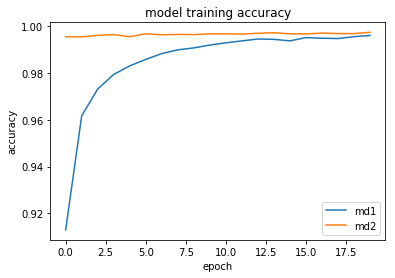

In [20]:
plt.plot(md.history["acc"])
plt.plot(md1.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["md1","md2"],loc="best") # local = best
plt.show()

In [24]:
score = model.evaluate(x_test_1, y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

10000/10000 [==============================] - 0s 25us/step
測試資料的 loss: 0.0035931720413793
測試資料正確率: 0.9796


In [25]:
score1 = model.evaluate(x_test, y_test)
print('測試資料的 loss:', score1[0])
print('測試資料正確率:', score1[1])

10000/10000 [==============================] - 0s 25us/step
測試資料的 loss: 0.0035931720413793
測試資料正確率: 0.9796


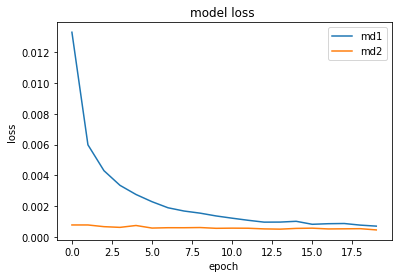

In [22]:
plt.plot(md.history["loss"])
plt.plot(md1.history["loss"])
plt.title("model loss ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["md1","md2"],loc="best") # local = best
plt.show()